# Lab Thursday 23 October
### Members: Khaled, Aya, Fatima, Georges

<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Georg\AppData\Local\Temp\ipykernel_11584\1349691275.py:39: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p_scaled, 'r-', linewidth=2.5, label=f'Normal fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
C:\Users\Georg\AppData\Local\Temp\ipykernel_11584\1349691275.py:39: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p_scaled, 'r-', linewidth=2.5, label=f'Normal fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')


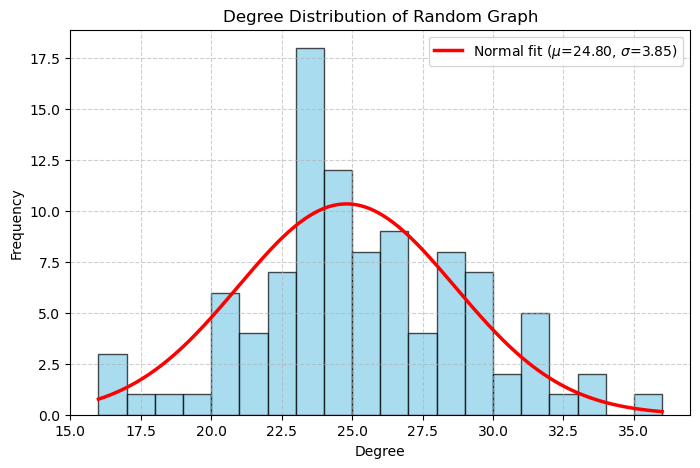

In [75]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.stats import norm

n, m = 100, 3

# Construction of A (random adjacency matrix)
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            A[i][j] = rd.randint(0, 1)

# Make A symmetric (undirected graph)
A_sym = (A + A.T)//2

# Degree matrix D (diagonal)
D = np.zeros((n, n))
for i in range(n):
    D[i][i] = np.sum(A_sym[i])

# Degrees (node degrees)
degrees = np.diag(D)

# Plot histogram
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(degrees, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Fit normal distribution
mu, sigma = np.mean(degrees), np.std(degrees)
x = np.linspace(min(degrees), max(degrees), 200)
p = norm.pdf(x, mu, sigma)

# Scale the PDF to match histogram height
p_scaled = p * (len(degrees) * (bins[1] - bins[0]))

# Plot normal curve
plt.plot(x, p_scaled, 'r-', linewidth=2.5, label=f'Normal fit ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')

plt.title('Degree Distribution of Random Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [76]:
# Finding L
L=D-A_sym

# Eigenvalues and eigenvectors
eigenvalues, V = np.linalg.eig(L)

# Sort them
eigenvalues = np.sort(eigenvalues)

print(eigenvalues)

[7.42029847e-16 1.37250589e+01 1.40352440e+01 1.49605565e+01
 1.52052189e+01 1.54336571e+01 1.63577339e+01 1.68643205e+01
 1.70643972e+01 1.71796277e+01 1.74700726e+01 1.77717014e+01
 1.79263201e+01 1.81259790e+01 1.83671138e+01 1.84398237e+01
 1.85676964e+01 1.87602779e+01 1.89546216e+01 1.94643057e+01
 1.95852402e+01 1.97269313e+01 1.99236016e+01 2.01355013e+01
 2.02316340e+01 2.02440760e+01 2.05845475e+01 2.07736320e+01
 2.09185551e+01 2.11515088e+01 2.13193833e+01 2.15722996e+01
 2.16889329e+01 2.19727029e+01 2.20221461e+01 2.20422458e+01
 2.22131829e+01 2.24132598e+01 2.27754471e+01 2.29821454e+01
 2.30134685e+01 2.32271375e+01 2.34567360e+01 2.36261821e+01
 2.38040221e+01 2.38962871e+01 2.41774504e+01 2.42601881e+01
 2.44237319e+01 2.45461578e+01 2.49130061e+01 2.50090213e+01
 2.52433238e+01 2.54279891e+01 2.55591251e+01 2.56791753e+01
 2.57624107e+01 2.60497023e+01 2.62163586e+01 2.63754375e+01
 2.65138959e+01 2.68721916e+01 2.70162073e+01 2.71037664e+01
 2.72236710e+01 2.731293

Source nodes: [75 84 50 99 42 43 66 95 54 44]
Source nodes: [25 78 64 34 19 11 76 59 12 81]
Source nodes: [93  2 89 28 42 44 53 85 40 21]
Source nodes: [74 25 21 98  5 89 17 93 84 68]
Source nodes: [26 65 44 75 87 27 76 64 51 22]
Source nodes: [80 90 98 43 78 14  3 31 46 91]
Source nodes: [50 17 89 83 82 29  5 68 94 91]
Source nodes: [16  1 79 87 32 82 37 90 83 68]
Source nodes: [57 29 51 94 10 59 78  4  6 23]
Source nodes: [64 98 41 33 11 37 84 65 19 94]


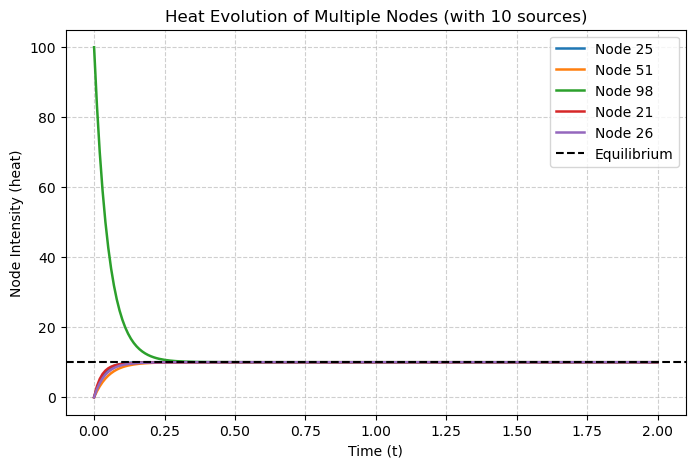

In [ ]:
# Diffusion Parameters 
t_values = np.linspace(0, 2.0, 200)
num_sources = 10   # how many random sources to generate

#  Simulate multiple random sources 
all_sources = np.random.choice(n, num_sources, replace=False)
f_t_sources = {}  # store decay curves

for source in all_sources:
    f0 = np.zeros(n)
    all_sources = np.random.choice(n, num_sources, replace=False)

    for s in all_sources:
        f0[s] = 100  # each source starts with 100 units of heat

    print(f"Source nodes: {all_sources}")

    # Diffusion Over Time 
    t_values = np.linspace(0, 2.0, 200)
    f_t_sources = []

    for t in t_values:
        E = np.exp(-eigenvalues * t)
        f_t = V @ (E * (V.T @ f0))
        f_t_sources.append(f_t)

    f_t_sources = np.array(f_t_sources)  # shape: (time_steps, n)

plt.figure(figsize=(8,5))
for node in np.random.choice(n, 5, replace=False):
    plt.plot(t_values, f_t_sources[:, node], linewidth=1.8, label=f'Node {node}')

plt.axhline(np.mean(f0), color='k', linestyle='--', label='Equilibrium')
plt.title(f'Heat Evolution of Multiple Nodes (with {num_sources} sources)')
plt.xlabel('Time (t)')
plt.ylabel('Node Intensity (heat)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

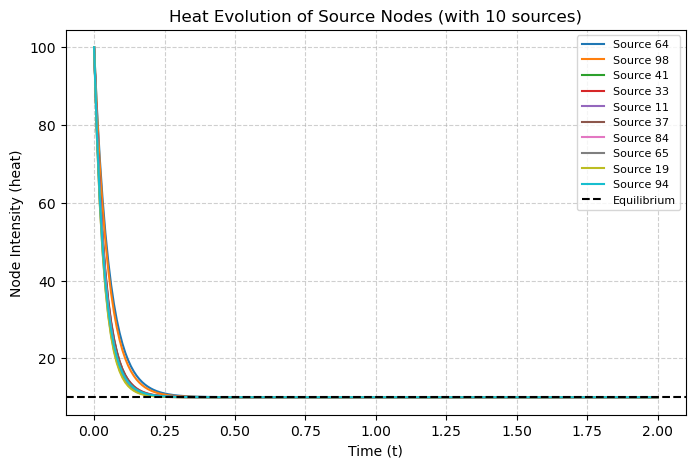

In [79]:
plt.figure(figsize=(8,5))

# plot all source nodes
for s in all_sources:
    plt.plot(t_values, f_t_sources[:, s], linewidth=1.5, label=f'Source {s}')

plt.axhline(np.mean(f0), color='k', linestyle='--', label='Equilibrium')
plt.title(f'Heat Evolution of Source Nodes (with {len(all_sources)} sources)')
plt.xlabel('Time (t)')
plt.ylabel('Node Intensity (heat)')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
